# Introduction to TensorFlow

In this tutorial we will take a first look at the TensorFlow library as well as the built-in high-level API Keras. It is based on the [official TensorFlow guides and tutorials](https://www.tensorflow.org/overview/). The official documents are much more detailed, so it is always a good idea to go through them.

Make sure you have a recent version of TensorFlow installed. Installation instructions can be found [here](https://www.tensorflow.org/install). If you have a beefy NVIDIA GPU, read [this](https://www.tensorflow.org/install/gpu). This tutorial is made with TF version 1.13.1. Note that TensorFlow 2.0 is on the horizon, which will introduce a bunch of cool [new features](https://medium.com/tensorflow/whats-coming-in-tensorflow-2-0-d3663832e9b8), however, as it is still in alpha at this point, we will stick to this version for now. Below you can check your installed version of TF:

In [1]:
import tensorflow as tf
print('TensorFlow version: {}'.format(tf.__version__))

TensorFlow version: 1.13.1


At this point we have to enable eager execution, since it can only be done immediately after importing. This will be relevant later in the tutorial.

In [2]:
tf.enable_eager_execution()

## Sequential Models with Keras
The easiest way of building deep learning models with TensorFlow is by using the high-level API Keras, which allows for easy definition of standard models in a sequential manner, i.e. by chaining together a number of layers. TensorFlow ships with its own implementation of Keras:

In [3]:
print('Keras version: {}'.format(tf.keras.__version__))

Keras version: 2.2.4-tf


### Example: Digit Recognition
We will start by creating a feed-forward network for hand-written digit recognition using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). It contains images, where each image shows one hand-written digit. The task is to classify each image into one of ten classes, one for each digit. This dataset is included in TensorFlow and can easily be loaded:

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The data is already split in training and test sets. We can inspect the shape of the arrays to find out the number of examples and resolution of the images. In this case we have $60000$ training examples and $10000$ testing examples. The images are $28 \times 28$ pixels.

In [5]:
print('shape of x_train: {}'.format(x_train.shape))
print('shape of y_test: {}'.format(y_test.shape))

shape of x_train: (60000, 28, 28)
shape of y_test: (10000,)


In many cases it is useful to normalize the data. Our values are currently in $[0, 255]$. We normalize them to $[0, 1]$. 

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Finally we can define our model. It is as simple as creating a `tf.keras.models.Sequential` object and adding a bunch of layers to it.

In [7]:
model = tf.keras.Sequential()

The first thing we need to to is flatten the input. Right now our images have a shape of $(28, 28)$. Since our model consists of regular fully-connected layers, we need to convert them to vectors. This can be done using a `tf.keras.layers.Flatten` layer, which is our model's input layer.

In [8]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

Now we can add some hidden layers. In our case we add a single dense (fully connected) hidden layer with $512$ neurons as well as some dropout regularization. In each layer we can specify the number of neurons and the activation function.

In [9]:
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Finally we add our output layer. Since we have $10$ classes, we need $10$ output neurons, where each neuron outputs the probability that the input image belongs to its class. Recall the definition of the _softmax_ function:
\begin{equation}
	softmax(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{m} e^{y_j}}
\end{equation}
Using the softmax as activation function produces a probability distribution in the output layer, where we can then select the class with the highest probability.

In [10]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Now our model is complete. We just need to choose a loss function and an optimizer. This can be done using the `compile` function. We choose the `adam` optimizer and cross entropy loss. We can also specify some metrics which will be reported during training.

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

After compiling the model, we can optionally print a summary:

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Since we already have our data in the right format, training the model is as easy as calling the `fit` function. We can specify some parameters like the batch size or number of training epochs. After every epoch, it reports the loss and the metrics we specified earlier.

In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2170 - acc: 0.9365
Epoch 2/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0974 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0689 - acc: 0.9779
Epoch 4/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0549 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0426 - acc: 0.9862


Now that our model is trained, we can use it to make some predictions. Let's take the first item in the test set and predict its class. Note that our model expects batches as inputs, i.e. the shape should be $(b, 28, 28)$, where $b$ is the batch size (this can be variable). Even if we only want to input a single example, the shape must be $(1, 28, 28)$.

In [14]:
import numpy as np

print('Real label: {}'.format(y_test[0]))
model_input = np.asarray([x_test[0]])
prediction = model.predict(model_input)
print('Predicted probabilities: {}'.format(prediction.flatten()))
print('Class with highest probability: {} ({})'.format(np.argmax(prediction), np.max(prediction)))

Real label: 7
Predicted probabilities: [1.5490368e-09 6.4304819e-09 7.0419937e-08 1.4518483e-06 6.6623326e-15
 4.0967039e-09 4.0574503e-16 9.9999678e-01 9.4360297e-09 1.6224691e-06]
Class with highest probability: 7 (0.9999967813491821)


Our model assigned the image to the correct class with a probability of almost $100\%$.

We can evaluate the model on the test set using our metrics from earlier:

In [15]:
loss, acc = model.evaluate(x_test, y_test)
print('Loss = {}, accuracy = {}'.format(loss, acc))

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0666 - acc: 0.9804
Loss = 0.06656300846789381, accuracy = 0.980400025844574


Congratulations, you trained and evaluated your first Keras model! The trained weights can now be saved in a file with a simple command:

In [16]:
model.save_weights('model_weights.h5')

Loading them back is just as easy:

In [17]:
model.load_weights('model_weights.h5')
loss, acc = model.evaluate(x_test, y_test)
print('Loss = {}, accuracy = {}'.format(loss, acc))

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0666 - acc: 0.9804
Loss = 0.06656300846789381, accuracy = 0.980400025844574


Note that the functions above only save the model's parameters, and not the model configuration itself. To save the complete model, use `save` and `tf.keras.models.load_model`. Note that this seems to be [currently bugged](https://github.com/tensorflow/tensorflow/issues/27688), and it throws a runtime error at the time of writing this tutorial, hence we don't show it here.

### Validation
So far we have only trained our model for a fixed number of epochs on our training data. However, this approach is very prone to overfitting. It is usually best to keep a smaller number of examples as a validation set (or dev set) and calculate the loss on this set after every epoch. As soon as we see the validation loss increase, we should stop the training to avoid overfitting.

In order to tell Keras to stop after it has detected an increase in validation loss, we use a _callback_ function. These functions will be called after every training epoch. For early stopping, we can use the pre-made function `tf.keras.callbacks.EarlyStopping` to monitor the validation loss `val_loss`. We can also set the `patience` parameter, which describes the maximum number of epochs where an increase is tolerated before stopping.

In [18]:
cb_early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

We can now start the training a new model, this time with validation data and early stopping. This time we set the number of epochs to a very high number to make sure we train until the validation loss stops decreasing. By setting `validation_split` to $0.1$ we automatically use $10\%$ of the training data for validation.

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cb_early_stop], validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 8s 148us/sample - loss: 0.2318 - acc: 0.9302 - val_loss: 0.0985 - val_acc: 0.9705
Epoch 2/100
54000/54000 [==============================] - 8s 150us/sample - loss: 0.1008 - acc: 0.9685 - val_loss: 0.0845 - val_acc: 0.9762
Epoch 3/100
54000/54000 [==============================] - 8s 146us/sample - loss: 0.0717 - acc: 0.9775 - val_loss: 0.0656 - val_acc: 0.9795
Epoch 4/100
54000/54000 [==============================] - 8s 148us/sample - loss: 0.0542 - acc: 0.9830 - val_loss: 0.0665 - val_acc: 0.9798
Epoch 5/100
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0457 - acc: 0.9854 - val_loss: 0.0647 - val_acc: 0.9810
Epoch 6/100
54000/54000 [==============================] - 8s 147us/sample - loss: 0.0374 - acc: 0.9879 - val_loss: 0.0640 - val_acc: 0.9820
Epoch 7/100
54000/54000 [==============================] - 8s 151us/sample - loss: 0.0328 - acc: 0.9889 -

We can see that the validation loss starts to increase after just a couple of epochs and training stops accordingly.

## Checkpoints
Model checkpointing is an important technique when you train models over a longer period of time. You want to save your trained weights after every couple of epochs for two reasons:
1. If the process is killed unexpectedly, you don't lose your progress.
2. If your model starts to overfit, you can use the last 'good' checkpoint.

In Keras, checkpoints are implemented through a callback function, `tf.keras.callbacks.ModelCheckpoint`. It will save checkpoints in a directory `model_ckpt` after every two epochs. The file name is important here, as it determines whether or not checkpoints will be overwritten. The file name in the example below will include the epoch and validation loss and make sure the checkpoints are not overwritten. We use `save_weights_only=True` here because of the aforementioned bug.

In [20]:
import os
os.makedirs('model_ckpt', exist_ok=True)
filepath = os.path.join('model_ckpt', 'weights.{epoch:02d}-{val_loss:.2f}.hdf5')
cb_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath, period=2, save_weights_only=True)

Alternatively, by setting the parameters `monitor='val_loss'` and `save_best_only=True`, we can keep just the checkpoint with the lowest validation loss.

Let's train the same model yet again, this time with checkpoints.

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cb_early_stop, cb_ckpt], validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 8s 148us/sample - loss: 0.2331 - acc: 0.9304 - val_loss: 0.1064 - val_acc: 0.9675
Epoch 2/100
54000/54000 [==============================] - 8s 149us/sample - loss: 0.1012 - acc: 0.9699 - val_loss: 0.0813 - val_acc: 0.9762
Epoch 3/100
54000/54000 [==============================] - 8s 148us/sample - loss: 0.0729 - acc: 0.9774 - val_loss: 0.0695 - val_acc: 0.9792
Epoch 4/100
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0550 - acc: 0.9826 - val_loss: 0.0643 - val_acc: 0.9812
Epoch 5/100
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0450 - acc: 0.9854 - val_loss: 0.0754 - val_acc: 0.9783
Epoch 6/100
54000/54000 [==============================] - 8s 156us/sample - loss: 0.0372 - acc: 0.9873 - val_loss: 0.0641 - val_acc: 0.9825
Epoch 7/100
54000/54000 [==============================] - 8s 152us/sample - loss: 0.0327 - acc: 0.9891 -

## TensorBoard
TensorFlow ships with a great tool to monitor the training process and inspect the model. TensorBoard allows you to plot losses, metrics and other parameters like the learning rate in real time during the training and has many other cool features. In order to use it with our model, we have to export some data in log files while we train it. In Keras we can easily do this using, you guessed it, a callback, namely `tf.keras.callbacks.TensorBoard`.

In [22]:
cb_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs')

Now the log files will be created in a directory called `logs`. After the training has started, you can launch TensorBoard by running the command

`$ tensorboard --logdir=logs --host=localhost --port=1234`.

Navigate your browser to http://localhost:1234 to access TensorBoard.

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[cb_tensorboard], validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 156us/sample - loss: 0.2315 - acc: 0.9313 - val_loss: 0.0911 - val_acc: 0.9745
Epoch 2/10
54000/54000 [==============================] - 8s 151us/sample - loss: 0.1018 - acc: 0.9691 - val_loss: 0.0731 - val_acc: 0.9787
Epoch 3/10
54000/54000 [==============================] - 8s 155us/sample - loss: 0.0725 - acc: 0.9780 - val_loss: 0.0740 - val_acc: 0.9783
Epoch 4/10
54000/54000 [==============================] - 9s 163us/sample - loss: 0.0550 - acc: 0.9827 - val_loss: 0.0769 - val_acc: 0.9800
Epoch 5/10
54000/54000 [==============================] - 8s 154us/sample - loss: 0.0444 - acc: 0.9857 - val_loss: 0.0683 - val_acc: 0.9810
Epoch 6/10
54000/54000 [==============================] - 8s 152us/sample - loss: 0.0388 - acc: 0.9873 - val_loss: 0.0761 - val_acc: 0.9790
Epoch 7/10
54000/54000 [==============================] - 9s 168us/sample - loss: 0.0313 - acc: 0.9898 - val_lo

## Custom Models
Should you ever need to build a more complex or non-standard model, the Keras API might not provide all the necessary layers for you. In this case it is necessary to get your hands dirty and create cutom models using a lower-level API. TensorFlow supports two evaluation strategies:

1. ___Lazy evalution___ has been the default so far. Before doing any computations, all operations have to be defined in a _computation graph_. Afterwards the values of the graph's nodes can be calculated using some input data.

2. ___Eager execution___ was introduced recently. It is very similar to regular imperative programming, i.e. computations are executed immediately instead of after finalizing the computation graph.

Both strategies have their own advantages and disadvantages. In this tutorial we will only cover eager execution, as it is set to become the default in TensorFlow 2.

### Basics
The first thing we have to do is enable eager execution, which we did directly after importing TensorFlow. We can check whether eager execution is enabled using `tf.executing_eagerly()`:

In [24]:
print(tf.executing_eagerly())

True


Let's start by trying out some basic math operations. For example, we can define a constant $2 \times 2$ matrix using `tf.constant`:

In [25]:
a = tf.constant([[1, 2],
                 [3, 4]])

The result is a `tf.Tensor` object.

We can use regular Python operations on the matrices, for example `*` for element-wise multiplication or `@` for matrix multiplication.

In [26]:
print('a + a =\n{}\n'.format(a + a))
print('a * a =\n{}\n'.format(a * a))
print('a @ a =\n{}'.format(a @ a))

a + a =
[[2 4]
 [6 8]]

a * a =
[[ 1  4]
 [ 9 16]]

a @ a =
[[ 7 10]
 [15 22]]


It also supports broadcasting:

In [27]:
print('a + 1 =\n{}'.format(a + 1))

a + 1 =
[[2 3]
 [4 5]]


Note that the above operations do not mutate the Tensors, but create new ones each time.

Trainable variables can be represented using `tf.Variable`. These variables can be assigned new values.

In [28]:
v = tf.Variable(a)
print(v)

v.assign(v + a)
print(v)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[2, 4],
       [6, 8]], dtype=int32)>


### Example: Linear Model
We will now train a simple linear model using eager execution. Our model is a simple line with two parameters, the slope $m$ and the bias $b$. It produces an approximative function $f^*(x) = mx + b$.

Our model class contains the two parameter attributes as variables, which are randomly initialized. If we call the model now we get random outputs.

In [29]:
class Model(object):
    def __init__(self):
        self.m = tf.Variable(tf.random_uniform(shape=(1,)))
        self.b = tf.Variable(tf.random_uniform(shape=(1,)))
    def __call__(self, x):
        return self.m * x + self.b

model = Model()
print(model(1))

tf.Tensor([1.3388846], shape=(1,), dtype=float32)


The function we want our model to approximate is $f(x) = 3x + 2$. We first generate some noisy data.

In [30]:
from matplotlib import pyplot

def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = np.asarray(np.arange(x_start, x_end, delta))
    y = f(x) + (np.random.rand(*x.shape) - 0.5) * spread
    return x, y

f = lambda x: 3 * x + 2
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)
# plot the points
pyplot.plot(x, y, marker='.', linewidth=0, label='data')
# plot f
pyplot.plot(x, f(x), linewidth=3, label='f(x)')
pyplot.legend()
pyplot.show()

<Figure size 640x480 with 1 Axes>

Next, we have to define a loss function to minimize. In this case we choose the $L_2$ loss.

In [31]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

To train the model, we implement the gradient descent algorithm. We use a `tf.GradientTape` object to record all operations that are applied to our variables. Afterwards we can use it to compute the gradients and update the variables. We train the model for $1000$ iterations.

In [32]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dm, db = t.gradient(current_loss, [model.m, model.b])
    model.m.assign_sub(learning_rate * dm)
    model.b.assign_sub(learning_rate * db)

for _ in range(1000):
    train(model, x, y, 0.01)

To see the results, we plot our approximated function $f^*$ as well as the original function $f$.

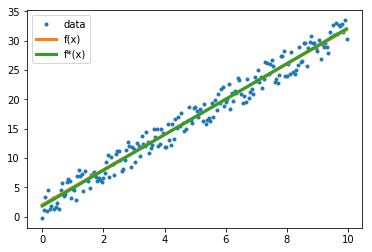

In [33]:
# plot the points
pyplot.plot(x, y, marker='.', linewidth=0, label='data')
# plot f
pyplot.plot(x, f(x), linewidth=3, label='f(x)')
# plot f*
pyplot.plot(x, model(x), linewidth=3, label='f*(x)')
pyplot.legend()
pyplot.show()

### Custom Keras Layers
It is also possible to subclass `tf.keras.layers.Layer` in order to define your own Keras layers. These can then be used in sequential models. Simply override the methods `__init__`, `build` and `call`. The `build` function is called once when the layer is used for the first time, which provides us with the input shape (depending on the previous layer). In the example below we implement a simpler version of `tf.keras.layers.Dense`, i.e. a dense layer with just a weight matrix but no bias.

In [34]:
class MySimpleLayer(tf.keras.layers.Layer):
    def __init__(self, output_units):
        super(MySimpleLayer, self).__init__()
        self.output_units = output_units
    def build(self, input_shape):
        self.kernel = self.add_variable('kernel', [input_shape[-1], self.output_units])
    def call(self, input):
        return tf.matmul(input, self.kernel)

### Custom Keras Models
Additionally it is possible to subclass `tf.keras.Model` to build a custom model. This is useful if you need a model which is not strictly sequential. We again override `__init__` and `call`. Here we simply call the individual layers to apply them to some inputs. This allows us for example to apply the same layer twice:

In [35]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=10)
        self.dense2 = tf.keras.layers.Dense(units=10)
    def call(self, input):
        result = self.dense1(input)
        result = self.dense2(result)
        result = self.dense2(result)  # reuse variables from dense2 layer
        return result

### Custom Training
Finally, we will use eager execution mode to train our MNIST model from before. Note that we removed the softmax activation from the last layer as there is a loss function which takes care of this.

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    tf.keras.layers.Dense(10)])

We first create a function that yields batches of our training data. We cast the images to float and the labels to int, as this is expected by the loss function we will use.

In [37]:
def get_batches(x, y, batch_size):
    assert len(x) == len(y)
    for i in range(0, len(x), batch_size):
        yield tf.cast(x[i:i + batch_size], tf.float32), tf.cast(y[i:i + batch_size], tf.int32)

This time we will use a pre-implemented optimizer (`tf.train.AdamOptimizer`). For every batch we run the forward pass to obtain the logits. We then compute the cross entropy loss. Finally we calculate and apply the gradients using `tf.GradientTape` and the optimizer.

In [38]:
optimizer = tf.train.AdamOptimizer()
for images, labels in get_batches(x_train, y_train, 32):
    with tf.GradientTape() as tape:
        logits = model(images, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step=tf.train.get_or_create_global_step())

Instructions for updating:
Use tf.cast instead.


## Further Reading
In this tutorial we only scratched the surface on what's possible with TensorFlow. Below are some links about advanced topics.
* [Estimators](https://www.tensorflow.org/guide/estimators) - another high-level API
* [`tf.data`](https://www.tensorflow.org/guide/datasets) - import data
* [TensorFlow Serving](https://github.com/tensorflow/serving) - serve trained models
* [TensorFlow Hub](https://www.tensorflow.org/hub) - share TensorFlow models